In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.table import Table, Column, join

plt.rcParams['figure.figsize'] = (20, 10)

In [10]:
hdulist = fits.open('/home/aalvarez/Work/Data/WillPP/TargetPP.fits', hdu=1)
t = hdulist[1].data

In [11]:
target = Table.read('/home/aalvarez/Work/Data/WillPP/Target.fits')

In [12]:
merged = join(t, target, 'ID')

In [36]:
original = np.load('/home/aalvarez/Work/Data/WillPP/mc_data_0.npy')
origi_pdz = np.load('/home/aalvarez/Work/Data/WillPP/pdz_data_0.npy')

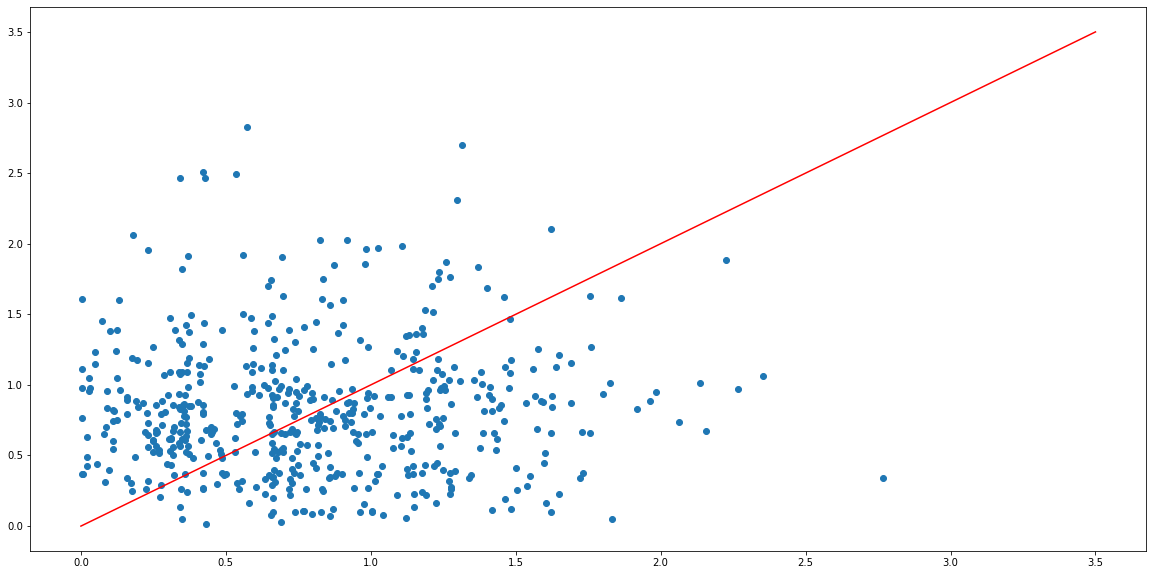

In [19]:
plt.figure()
plt.scatter(merged['Z'], merged['REDSHIFT_MEDIAN'])
plt.plot([0,3.5], [0,3.5], c='red')

In [20]:
idx = np.arange(len(t))
np.random.shuffle(idx)

In [58]:
def plot_pp_pdf(name, nobjects=5):
    fig, axes = plt.subplots(ncols=3, nrows=nobjects, figsize=(20, 15))
    fig.suptitle(name)

    bins = hdulist[f'BINS_MC_PDF_1D_{name}'].data['BINS_PDF']
    pdz_bins = hdulist['BINS_PDF'].data['BINS_PDF']
    
    bins2d = hdulist[f'BINS_MC_PDF_2D_Z_{name}']
    xx = bins2d.data['Z'].reshape(99,99)
    yy = bins2d.data[name].reshape(99,99)
    
    for o, ax in zip(t[idx[:nobjects]], axes):
        true = original[o['ID']]
        v2d = o[f'MC_PDF_2D_Z_{name}'].reshape(99,99)
        opdz = origi_pdz[o['ID']+1]
        opdz /= np.trapz(opdz, pdz_bins)
        
        ax[0].hist(true[name], bins=(bins - (bins[1]-bins[0])/2), density=True, label='True')
        ax[0].plot(bins, o[f'MC_PDF_1D_{name}'], label='Reconstructed')
        ax[0].legend()
        
        ax[1].set_title(f'PDZ {o["FLAGS_1"]}')
        ax[1].plot(pdz_bins, opdz, label='True')
        ax[1].plot(pdz_bins, o['REDSHIFT_PDF'], label='Reconstructed')
        ax[1].axvline(true['Z'].mean(), color='red', label='Z', linestyle=':')
        ax[1].legend()
        
        ax[2].contour(xx, yy, v2d)
        ax[2].set_xlabel('Z')
        ax[2].set_ylabel(name)
        
    plt.tight_layout()

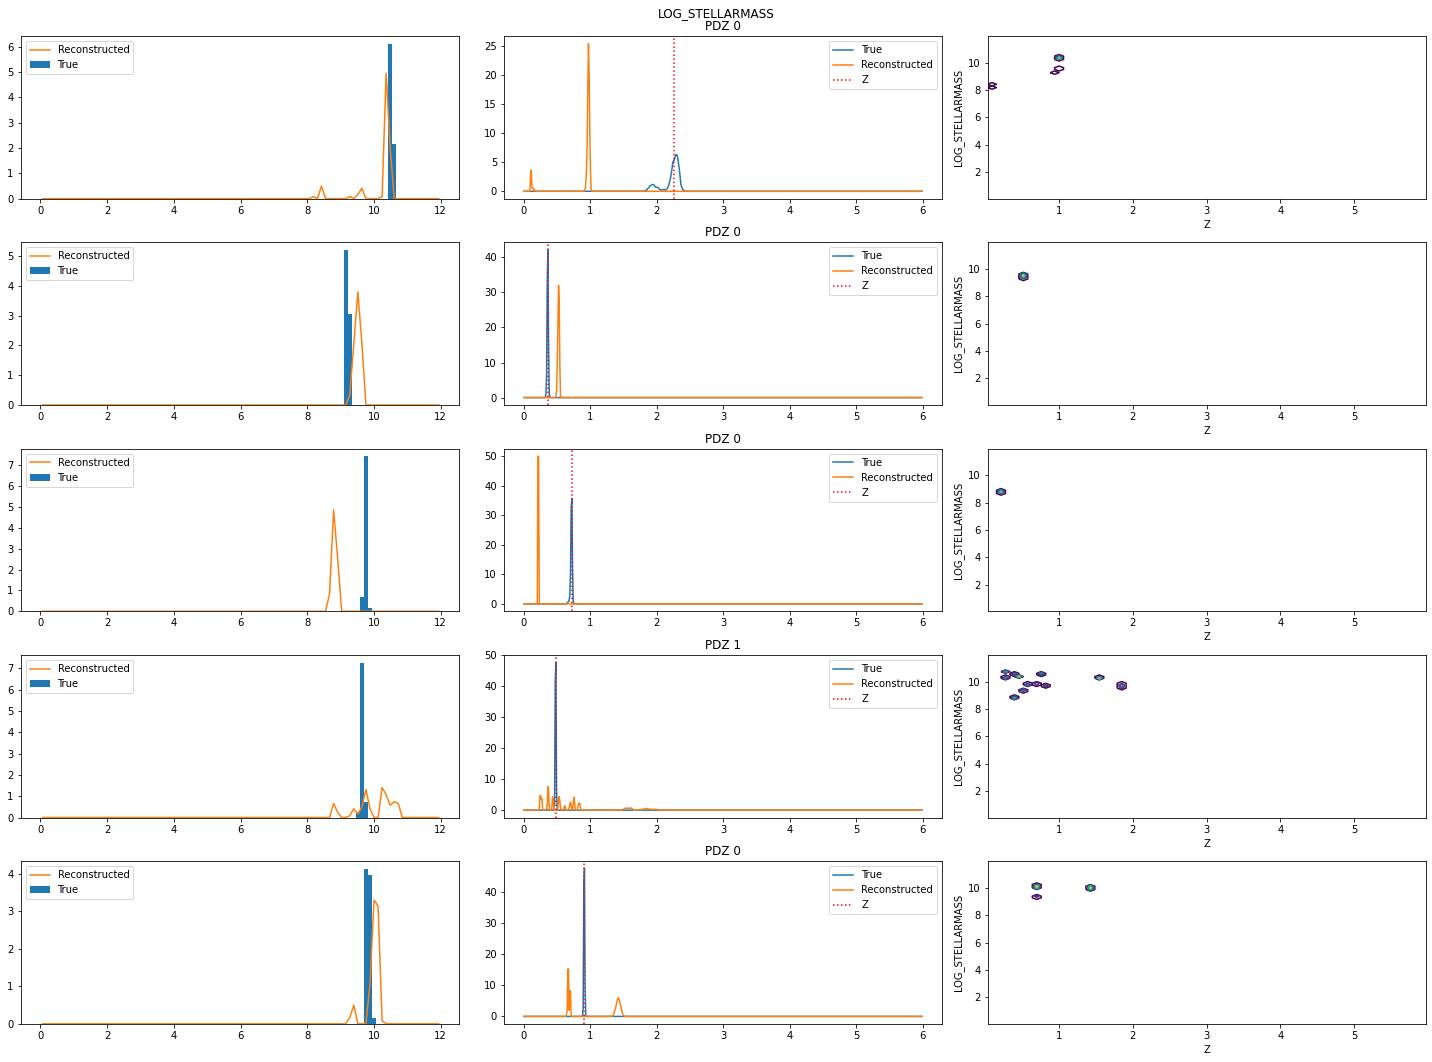

In [59]:
plot_pp_pdf('LOG_STELLARMASS')

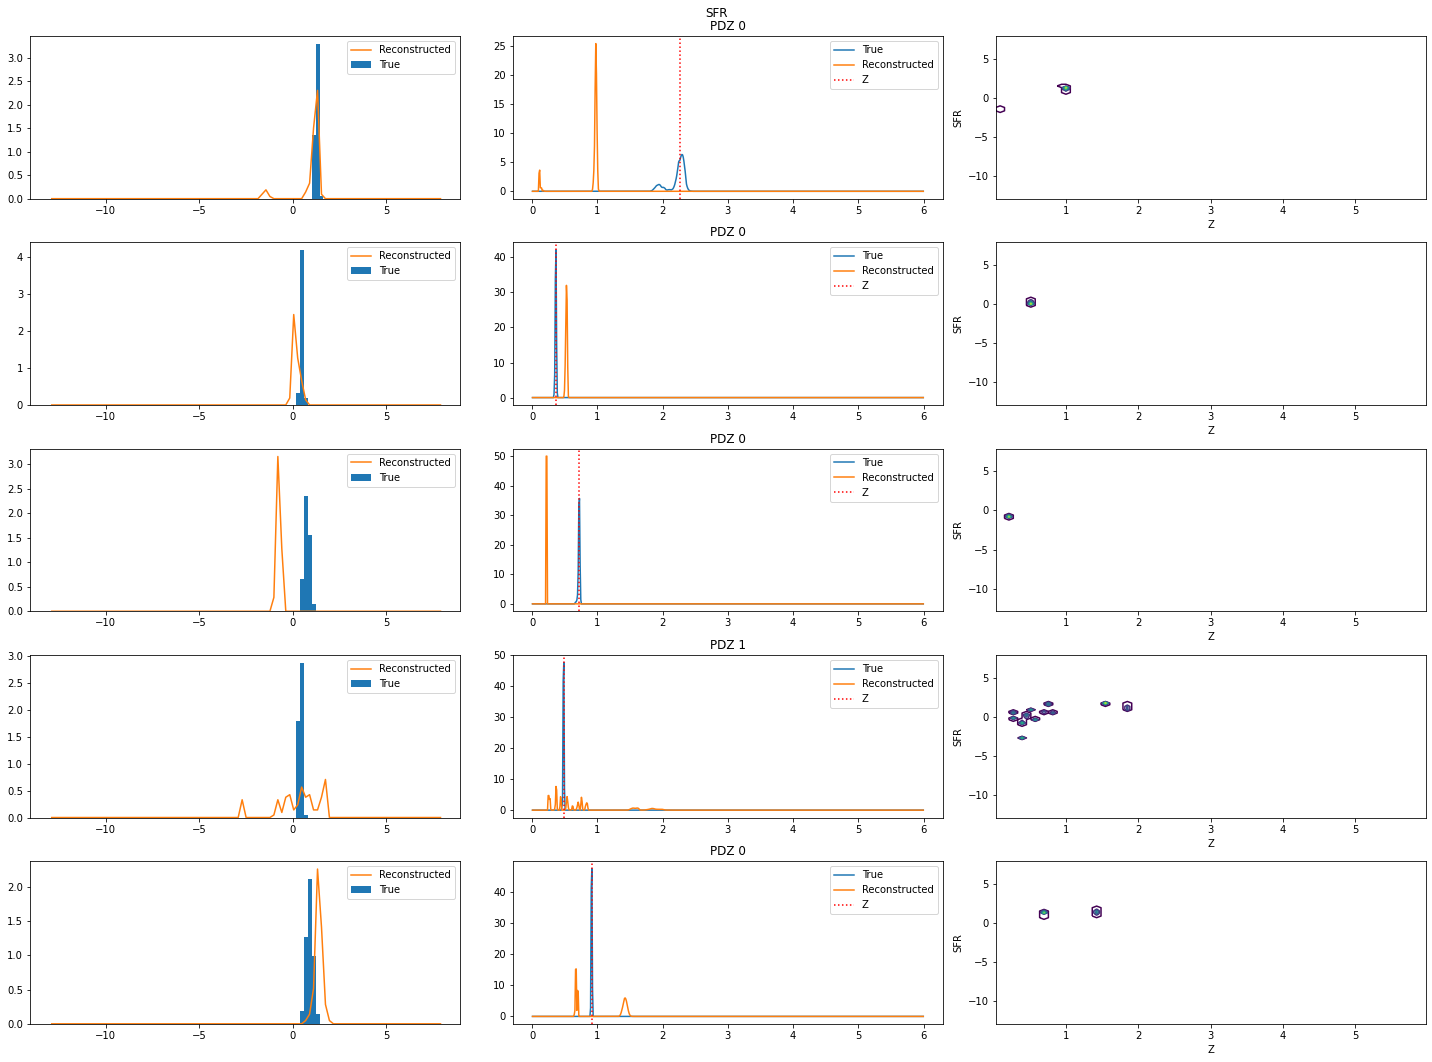

In [60]:
plot_pp_pdf('SFR')